# Task-1 Data Preprocessing

In [1]:
# Importing pandas library
import pandas as pd
import numpy as np

# Importing the csv data files 
data = pd.read_csv('chocolate.csv',error_bad_lines=False, warn_bad_lines=True)
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [2]:
# Printing some information about the dataset
print data.shape
print 'Columns of dataset- \n', data.columns
print data.info()

(1500, 9)
Columns of dataset- 
Index([u'Company \n(Maker-if known)', u'Specific Bean Origin\nor Bar Name',
       u'REF', u'Review\nDate', u'Cocoa\nPercent', u'Company\nLocation',
       u'Rating', u'Bean\nType', u'Broad Bean\nOrigin'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Company 
(Maker-if known)           1500 non-null object
Specific Bean Origin
or Bar Name    1500 non-null object
REF                                 1500 non-null int64
Review
Date                         1500 non-null int64
Cocoa
Percent                       1500 non-null object
Company
Location                    1500 non-null object
Rating                              1500 non-null float64
Bean
Type                           1499 non-null object
Broad Bean
Origin                   1499 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 105.5+ KB
None


In [3]:
# Renaming the column name
new_col_names = ['company', 'bean_origin', 'REF', 'review_date', 'cocoa_percent',
                'company_location', 'rating', 'bean_typ', 'country_origin']
data_clean = data.rename(columns=dict(zip(data.columns, new_col_names)))
data_clean.head()

,company,bean_origin,REF,review_date,cocoa_percent,company_location,rating,bean_typ,country_origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [4]:
# Function to count the number of null values for each column in a dataset
def count_null_values(dataset, column_list):
    for i in range (len(column_list)):
        print "The total number of null values in :",column_list[i]
        print dataset[column_list[i]].isnull().sum()
    return

# Function to print the unique values of a dataset
def print_uniques(dataset, column_list):
    for i in range (len(column_list)):
        print "Unique values for the column:",column_list[i]
        print dataset[column_list[i]].unique()
        print '\n'
    return

# Printing the unique values for each feature in the dataset
print_uniques(data_clean, data_clean.columns)
# Printing the null values for each feature in the dataset
count_null_values(data_clean, data_clean.columns)

Unique values for the column: company
['Valrhona' 'Original Beans (Felchlin)' 'Potomac' 'Middlebury'
 'Carlotta Chocolat' 'Salgado' 'Cacao Store' 'Kaoka (Cemoi)' 'Woodblock'
 'Dormouse' 'Soma' 'Mast Brothers' 'Bittersweet Origins'
 'Chocolate Tree, The' 'Mayacama' 'Fruition' 'Mars' 'Fresco'
 'Tablette (aka Vanillabeans)' 'Compania de Chocolate (Salgado)' 'Pralus'
 'Coppeneur' 'Chchukululu (Tulicorp)' 'Black Mountain' 'Bonnat' 'hexx'
 'Askinosie' 'Danta' 'Quetzalli (Wolter)' "K'ul" 'Chocolats Privilege'
 'Momotombo' 'Republica del Cacao (aka Confecta)' 'Tejas'
 'Svenska Kakaobolaget' 'Benoit Nihant' 'Amedei' 'Chloe Chocolat'
 'Montecristi' 'Domori' 'Guido Castagna' 'Madre' 'Emerald Estate'
 'Starchild' 'Lonohana' 'Ah Cacao' 'TCHO' 'Violet Sky' 'Mission'
 'French Broad' 'Kto' 'Theo' 'Kyya' 'Letterpress' 'Ocho' 'Sirene'
 'Palette de Bine' 'Arete' 'Dandelion' 'Georgia Ramon' 'Malmo' 'Bright'
 'Garden Island' 'A. Morin' 'Parliament' 'Kallari (Ecuatoriana)'
 'Harper Macaw' 'Friis Holm (Bonna

### Conducting Feature Engineering

In [5]:
# Creating new column named maker 
data_clean['company_coffee'], data_clean['maker'] = data_clean['company'].str.split('(', 1).str
# Replacing the missing values with "Unknown"
print data_clean.head(4)
data_clean['maker'].fillna(value='Unknown', inplace = True) 
#data_clean["maker"].replace(np.nan, "Unknown")
print data_clean.head()
print data_clean.info()
# Removing unwanted character
data_clean['maker'] = data_clean['maker'].apply(lambda x: x.split(')')[0])
# Dropping the original column
data_clean = data_clean.drop('company', 1)

print data_clean.head(4)



                     company                                 bean_origin  \
0                   Valrhona                                     Manjari   
1  Original Beans (Felchlin)  Grand Cru Blend No.1, 5 yr. Anniversary Ed   
2                    Potomac                               Upala w/ nibs   
3                 Middlebury                   Matagalpa, Cacao Bisiesto   

    REF  review_date cocoa_percent company_location  rating  \
0   129         2007           64%           France    4.00   
1  1442         2014           80%      Switzerland    3.25   
2   647         2011           70%           U.S.A.    3.50   
3  1538         2015           70%           U.S.A.    3.50   

              bean_typ country_origin   company_coffee      maker  
0  Criollo, Trinitario     Madagascar         Valrhona        NaN  
1                Blend                 Original Beans   Felchlin)  
2               Matina     Costa Rica          Potomac        NaN  
3                           Nic

In [6]:
# Converting the string values to lower case
data_clean['bean_typ'] = data_clean['bean_typ'].str.lower()

# Creating new column named sub_bean_type 
data_clean['bean_type'], data_clean['sub_bean_type'] = data_clean['bean_typ'].str.split(',', 1).str
# Replacing the missing values with "Unknown"
data_clean["sub_bean_type"].fillna("unknown", inplace = True) 
# Removing unwanted character
data_clean['sub_bean_type'] = data_clean['sub_bean_type'].apply(lambda x: x.split(')')[0])
# Dropping the original column
data_clean = data_clean.drop('bean_typ', 1)

print data_clean.head(10)
print data_clean['bean_type'].unique()

                                  bean_origin   REF  review_date  \
0                                     Manjari   129         2007   
1  Grand Cru Blend No.1, 5 yr. Anniversary Ed  1442         2014   
2                               Upala w/ nibs   647         2011   
3                   Matagalpa, Cacao Bisiesto  1538         2015   
4                                       Cesar  1888         2016   
5                                  Rio Arriba   292         2008   
6                                  Madagascar  1684         2015   
7                                        Noir   404         2009   
8                                  Gran Couva  1042         2013   
9                           Colombia, Batch 9  1676         2015   

  cocoa_percent company_location  rating country_origin     company_coffee  \
0           64%           France    4.00     Madagascar           Valrhona   
1           80%      Switzerland    3.25                   Original Beans    
2           70%  

### Conducting Data Cleaning

In [7]:
# Some data cleaning regarding bean type name
data_clean['bean_type'] = data_clean['bean_type'].replace('forastero (arriba) asss', 'forastero (arriba)')
data_clean['bean_type'] = data_clean['bean_type'].replace('forastero (arriba) ass', 'forastero (arriba)')
print data_clean['bean_type'].unique()

['criollo' 'blend' 'matina' '\xc2\xa0' 'ccn51' 'forastero (arriba)'
 'trinitario' 'amazon mix' 'nacional' 'forastero (nacional)' 'forastero'
 'criollo (ocumare 61)' nan 'trinitario (85% criollo)' 'criollo (amarru)'
 'beniano' 'forastero (parazinho)' 'criollo (porcelana)'
 'criollo (ocumare 67)' 'criollo (wild)' 'nacional (arriba)' 'amazon'
 'blend-forastero' 'trinitario (amelonado)' 'eet' 'trinitario (scavina)'
 'criollo (ocumare 77)' 'forastero (catongo)']


In [8]:
# Data cleaning regarding the Broad Bean Origin column
print "Before Cleaning country_origin column: "
print data_clean['country_origin'].unique()
data_clean['country_origin'] = data_clean['country_origin'].replace('Domincan Republic', 'Dominican Republic')
data_clean['country_origin'] = data_clean['country_origin'].replace('Carribean(DR/Jam/Tri)', 'Carribean')
data_clean['country_origin'] = data_clean['country_origin'].replace('Trinidad-Tobago', 'Trinidad, Tobago')
data_clean['country_origin'] = data_clean['country_origin'].replace("Peru, Mad., Dom. Rep.", "Peru, Madagascar, Dominican Republic")
data_clean['country_origin'] = data_clean['country_origin'].replace("Central and S. America", "Central and South America")
data_clean['country_origin'] = data_clean['country_origin'].replace("PNG, Vanuatu, Mad", "Papua New Guinea, Vanuatu, Madagascar")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven., Trinidad, Mad.", "Venezuela, Trinidad, Madagascar")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven.,Ecu.,Peru,Nic.", "Venezuela, Ecuador, Peru, Nicaragua")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ven, Trinidad, Ecuador","Venezuela, Trinidad, Ecuador")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ghana, Domin. Rep", "Ghana, Dominican Republic")
data_clean['country_origin'] = data_clean['country_origin'].replace("Ecuador, Mad., PNG","Ecuador, Madagascar, Papua New Guinea")
data_clean['country_origin'] = data_clean['country_origin'].replace("Mad., Java, PNG","Madagascar, Java, Papua New Guinea")
data_clean['country_origin'] = data_clean['country_origin'].replace("Gre., PNG, Haw., Haiti, Mad", "Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar")

print "After Cleaning country_origin column: "
print data_clean['country_origin'].unique()

Before Cleaning country_origin column: 
['Madagascar' '\xc2\xa0' 'Costa Rica' 'Nicaragua' 'Colombia' 'Ecuador'
 'Trinidad' 'Venezuela' 'Dominican Republic' 'Peru'
 'Peru, Mad., Dom. Rep.' 'Domincan Republic' 'Jamaica' 'Vietnam' 'Mexico'
 'Honduras' 'Guatemala' 'Sri Lanka' 'Indonesia' 'Puerto Rico' 'St. Lucia'
 'Hawaii' 'Peru, Ecuador' 'Ghana' 'Brazil' 'Ivory Coast' 'Uganda' 'Samoa'
 'Tanzania' 'Papua New Guinea' 'Togo' 'Bolivia' 'Panama' 'Belize'
 'Vanuatu' 'Fiji' 'Peru, Madagascar' 'Central and S. America' 'Tobago'
 'Sao Tome' 'Trinidad, Tobago' 'Cuba' 'Ven, Bolivia, D.R.'
 'Sao Tome & Principe' 'Carribean' 'Venezuela, Dom. Rep.'
 'Dominican Rep., Bali' 'Ghana, Panama, Ecuador' 'Grenada' 'Principe'
 'Venezuela, Trinidad' 'Australia' 'South America' 'Colombia, Ecuador'
 'Ecuador, Costa Rica' 'South America, Africa' 'Malaysia' 'Congo'
 'PNG, Vanuatu, Mad' 'Gre., PNG, Haw., Haiti, Mad' 'Haiti' 'Philippines'
 'Ven., Trinidad, Mad.' 'Suriname' 'Peru, Ecuador, Venezuela' 'Martinique'
 'Dom.

In [9]:
# Data cleaning the bean origin column

data_clean['bean_origin'] = data_clean['bean_origin'].str.lower()

data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split(',')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('/')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('*')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('.')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('+')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split(';')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('-')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('(')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('#')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('1')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('2')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('3')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('4')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('5')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('6')[0])
data_clean['bean_origin'] = data_clean['bean_origin'].apply(lambda x: x.split('7')[0])
print data_clean['bean_origin'].unique()
#print data_clean['bean_origin'].head()

['manjari' 'grand cru blend no' 'upala w' 'matagalpa' 'cesar' 'rio arriba'
 'madagascar' 'noir' 'gran couva' 'colombia' 'ocumare'
 'dominican republic' 'sambirano' 'peru' 'shake shack' 'hispaniola'
 'coto brus' 'matina ' 'jamaica' 'vietnam' 'colombie' 'los rios' 'arriba'
 'matiguas' 'selva maya' 'ecuador' 'cortes' 'los ujuxtes' 'mexico'
 'maranon' 'xoconusco' 'mombacho' 'el oro' 'capistrano' 'sri lanka' 'bali'
 'cahabon region' 'toscano black' 'blend no' 'manabi' 'ilblend'
 'puerto rico' 'emerald estate' 'opaeula estate' 'bellavista coop'
 'tabasco' 'criollo' 'nyangbo' 'fazenda camboa' 'san andres' 'porcelana'
 'ocumare ' 'ivory coast' 'uganda' 'choobua' 'oko caribe' 'sang yum coop'
 'camino verde p' 'kokoa kamili' 'png' 'trinidad' 'upala' 'conacado coop'
 'chuao' 'marabel farms' "kaua'i" 'akata' 'lachua' 'roberto' 'la red'
 'vale do juliana e' 'medagla' 'venezuela' 'bolivia' 'santo domingo'
 'maranon canyon' 'papua new guinea' 'corona arriba' 'colombian semi dark'
 'panama' 'belize' '

In [10]:
# Converting cocoa_percent to integer

print data_clean.info()
data_clean['cocoa_percent'] = data_clean['cocoa_percent'].apply(lambda x: x.split('%')[0])
data_clean['cocoa_percent'] = pd.to_numeric(data_clean['cocoa_percent'], errors='coerce')
print data_clean.info()
print data_clean['cocoa_percent'].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
bean_origin         1500 non-null object
REF                 1500 non-null int64
review_date         1500 non-null int64
cocoa_percent       1500 non-null object
company_location    1500 non-null object
rating              1500 non-null float64
country_origin      1499 non-null object
company_coffee      1500 non-null object
maker               1500 non-null object
bean_type           1499 non-null object
sub_bean_type       1500 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 129.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
bean_origin         1500 non-null object
REF                 1500 non-null int64
review_date         1500 non-null int64
cocoa_percent       1500 non-null float64
company_location    1500 non-null object
rating              1500 non-null float64
country_origin      1

In [11]:
# Changing the type for review_date from int to object to address it as a classification problem
data_clean['review_date'] = data_clean['review_date'].astype(str)
data_clean['rating'] = data_clean['rating'].astype(str)
print data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
bean_origin         1500 non-null object
REF                 1500 non-null int64
review_date         1500 non-null object
cocoa_percent       1500 non-null float64
company_location    1500 non-null object
rating              1500 non-null object
country_origin      1499 non-null object
company_coffee      1500 non-null object
maker               1500 non-null object
bean_type           1499 non-null object
sub_bean_type       1500 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 129.0+ KB
None


In [12]:
# Replacing the empty cells with null
data_clean = data_clean.replace('\xc2\xa0', np.nan)
count_null_values(data_clean, data_clean.columns)

The total number of null values in : bean_origin
0
The total number of null values in : REF
0
The total number of null values in : review_date
0
The total number of null values in : cocoa_percent
0
The total number of null values in : company_location
0
The total number of null values in : rating
0
The total number of null values in : country_origin
62
The total number of null values in : company_coffee
0
The total number of null values in : maker
0
The total number of null values in : bean_type
751
The total number of null values in : sub_bean_type
0


### Data Preprocessing

In [13]:
# Normalizing the column with integer type

# Data Normalizing
from sklearn.preprocessing import StandardScaler 
data_norm = data
scaler_z = StandardScaler()
# Only the columns with integer and float type values are normalized
num_d = data_clean.select_dtypes(exclude=['object'])
data_clean[num_d.columns] = scaler_z.fit(num_d).transform(num_d)

# Getting information of the dataset after normalization
print data_clean.head(10)
print data_clean[num_d.columns].mean(axis= 0)
print data_clean.info()

          bean_origin       REF review_date  cocoa_percent company_location  \
0             manjari -1.637271        2007      -1.207865           France   
1  grand cru blend no  0.730590        2014       1.347112      Switzerland   
2             upala w -0.703111        2011      -0.249749           U.S.A.   
3           matagalpa  0.903716        2015      -0.249749           U.S.A.   
4               cesar  1.534905        2016      -1.048179         Colombia   
5          rio arriba -1.343317        2008      -0.249749        Argentina   
6          madagascar  1.167012        2015      -0.249749            Japan   
7                noir -1.141337        2009      -0.249749           France   
8          gran couva  0.009231        2013      -0.249749           U.S.A.   
9            colombia  1.152585        2015       1.347112             U.K.   

  rating country_origin     company_coffee     maker           bean_type  \
0    4.0     Madagascar           Valrhona   Unknown  

/Users/nikita/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nikita/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


### Dealing with the null values for country_origin

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Creating a temp dataset
temp_data_co = data_clean
# dropping the bean_type column since it has missing values
temp_data_co= temp_data_co.drop('bean_type', 1)

# Splitting the dataset into null and not null dataframe
test_data_co = temp_data_co[temp_data_co["country_origin"].isnull()]
train_data_co = temp_data_co[temp_data_co["country_origin"].notnull()]

# Label encoding only the categorical columns 
test_data_co_l = test_data_co.apply(LabelEncoder().fit_transform)
test_data_co_l['REF'] = data_clean['REF']
test_data_co_l['cocoa_percent'] = data_clean['cocoa_percent']

train_data_co_l = train_data_co.apply(LabelEncoder().fit_transform)
train_data_co_l ['REF'] = data_clean['REF']
train_data_co_l['cocoa_percent'] = data_clean['cocoa_percent']

# Defining the X and y 
X = train_data_co_l.drop('country_origin', axis=1).values
y = train_data_co_l['country_origin'].values

print test_data_co.shape, train_data_co.shape

X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X, y, test_size= 0.1, train_size=0.9, random_state=42)

print X_train_co.shape, X_test_co.shape

# Training a KNN machine leanring model to replace the missing values
from sklearn.neighbors import KNeighborsClassifier
# The model gave the best result at n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_co, y_train_co)
y_pred = knn.predict(X_test_co)
print y_pred
print y_pred.size

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test_co)
pre = precision_score(y_pred, y_test_co, average='micro')
rec = recall_score(y_pred, y_test_co, average='micro')
f1 = f1_score(y_pred, y_test_co, average='micro')

print 'Model performace for replacing the missing values: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1

(62, 10) (1438, 10)
(1294, 9) (144, 9)
[50 47 17 50 18 12  8 17 50 17 75 12 37 29 39 39  3 17  3 18 48 18 15 48
 30  3  2 79  2 13 18 39 79 79 18 17 76 18 44 18  7 17 48 18  8  6 27 23
 37  4 17  3 50  3 39 39 79 17  4 18 22 17  2  7 18  3 33 13  9 50 18 23
  2 39  8 18 12 32 79  2 29 27  2  7 60  4 22  3 18 18 18 17 17  2 31 50
 48  3 17  3 31 18 17  2 39 18 17 13 39  2 18  3 72 39 39  7 79 39 31 50
 39 17 31  3  3 18 18 45 39 33 17 17 39 17  3 39 23 48 29  3 50 34 39 39]
144
Model performace for replacing the missing values: 
Accuracy:  0.3472222222222222
Precision:  0.3472222222222222
Recall:  0.3472222222222222
F1 Score:  0.3472222222222222


In [15]:
# Predicting the null values for country_origin
pred_data_co_l = test_data_co_l.drop('country_origin', axis=1).values

# y_pred containing the predicted value
y_pred = knn.predict(pred_data_co_l)
print y_pred.shape
print y_pred

# Storing the y_pred values in a column of a dataframe
temp1 = test_data_co_l
temp1["country_origin"] = y_pred
print temp1.head()

# Incrporating the result into the main dataset
dataset_clean_co = pd.concat([train_data_co_l, temp1], join = 'inner')
print dataset_clean_co.head()
print dataset_clean_co.shape

(62,)
[4 2 2 4 4 2 8 2 8 4 2 2 4 4 2 4 2 2 2 2 4 2 4 4 8 2 2 2 2 8 2 2 4 4 2 2 8
 4 4 8 2 4 2 4 2 2 8 2 4 2 4 2 2 2 2 4 4 2 4 2 2 8]
    bean_origin       REF  review_date  cocoa_percent  company_location  \
1            16  0.730590            8       1.347112                 8   
7            33 -1.141337            3      -0.249749                 4   
39           48 -1.563332            1      -1.367552                 5   
40            5 -0.658026            5      -0.249749                 4   
42           19 -1.379385            2      -0.249749                 5   

    rating  country_origin  company_coffee  maker  sub_bean_type  
1        6               4              23      3              0  
7        4               2              15      2              0  
39       7               2               0      6              0  
40       7               4               4      6              0  
42       8               4              10      6              0  
   bean_origin

### Dealing with the null values for bean_type

In [16]:
# Preparing the dataset by propping the country_origin column since it had missing values
temp_data_bt = data_clean
temp_data_bt = temp_data_bt.drop('country_origin', 1)

# Splitting the dataset into null and not null dataframe
test_data_bt = temp_data_bt[temp_data_bt["bean_type"].isnull()]
train_data_bt = temp_data_bt[temp_data_bt["bean_type"].notnull()]

# Label encoding only the categorical columns 
test_data_bt = test_data_bt.apply(LabelEncoder().fit_transform)
test_data_bt['REF'] = data_clean['REF']
test_data_bt['cocoa_percent'] = data_clean['cocoa_percent']

train_data_bt = train_data_bt.apply(LabelEncoder().fit_transform)
train_data_bt['cocoa_percent'] = data_clean['cocoa_percent']
train_data_bt['REF'] = data_clean['REF']

# Defining the X and y 
X = train_data_bt.drop('bean_type', axis=1).values
y = train_data_bt['bean_type'].values
print test_data_bt.head()
print test_data_bt.shape, train_data_bt.shape

X_train_bt, X_test_bt, y_train_bt, y_test_bt = train_test_split(X, y, test_size= 0.2, train_size=0.8, random_state=42)

print X_train_bt.shape, X_test_bt.shape

# Training a KNN machine leanring model to replace the missing values
from sklearn.neighbors import KNeighborsClassifier
# The model gave the best result at n_neighbors = 80
knn = KNeighborsClassifier(n_neighbors = 80)
knn.fit(X_train_bt, y_train_bt)
y_pred = knn.predict(X_test_bt)
print y_pred
print y_pred.size

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test_bt)
pre = precision_score(y_pred, y_test_bt, average='micro')
rec = recall_score(y_pred, y_test_bt, average='micro')
f1 = f1_score(y_pred, y_test_bt, average='micro')

print 'Model Performance: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1

    bean_origin       REF  review_date  cocoa_percent  company_location  \
3           211  0.903716            9      -0.249749                41   
7           235 -1.141337            3      -0.249749                12   
11           99 -0.838366            4      -0.249749                41   
15          143  1.246362           10       0.069623                41   
17          214 -0.901485            4      -1.048179                41   

    rating  company_coffee  maker  bean_type  sub_bean_type  
3        9             176     19          0              0  
7        6             136      4          0              0  
11       8             169     19          0              0  
15       7             171     19          0              0  
17       7             166     19          0              0  
(751, 10) (749, 10)
(599, 9) (150, 9)
[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22

In [17]:
# Predicting the null values for bean_type with the KNN model

pred_data_bean_l = test_data_bt.drop('bean_type', axis=1).values

# y_pred storing the predicted values
y_pred = knn.predict(pred_data_bean_l)
print y_pred.shape

temp = test_data_bt
temp["bean_type"] = y_pred
print temp.head()

# Incrporating the result into the main dataset
dataset_clean_bean = pd.concat([train_data_bt, temp], join = 'inner')
print dataset_clean_bean.head()
print dataset_clean_bean.shape

(751,)
    bean_origin       REF  review_date  cocoa_percent  company_location  \
3           211  0.903716            9      -0.249749                41   
7           235 -1.141337            3      -0.249749                12   
11           99 -0.838366            4      -0.249749                41   
15          143  1.246362           10       0.069623                41   
17          214 -0.901485            4      -1.048179                41   

    rating  company_coffee  maker  bean_type  sub_bean_type  
3        9             176     19         22              0  
7        6             136      4         22              0  
11       8             169     19         22              0  
15       7             171     19         22              0  
17       7             166     19         22              0  
   bean_origin       REF  review_date  cocoa_percent  company_location  \
0          170 -1.637271            1      -1.207865                14   
1          120  0.7305

### Preparing the final dataset

In [18]:
data_clean_label_encoding = dataset_clean_bean
data_clean_label_encoding['country_origin'] = dataset_clean_co['country_origin']
# Checking the dataset for null values after data processing
count_null_values(data_clean_label_encoding, data_clean_label_encoding.columns)


The total number of null values in : bean_origin
0
The total number of null values in : REF
0
The total number of null values in : review_date
0
The total number of null values in : cocoa_percent
0
The total number of null values in : company_location
0
The total number of null values in : rating
0
The total number of null values in : company_coffee
0
The total number of null values in : maker
0
The total number of null values in : bean_type
0
The total number of null values in : sub_bean_type
0
The total number of null values in : country_origin
0


### Printing the final dataframe after data pre-processing

In [19]:
print data_clean_label_encoding 

      bean_origin       REF  review_date  cocoa_percent  company_location  \
0             170 -1.637271            1      -1.207865                14   
1             120  0.730590            8       1.347112                42   
2             290 -0.703111            5      -0.249749                44   
4              60  1.534905           10      -1.048179                 8   
5             227 -1.343317            2      -0.249749                 1   
6             162  1.167012            9      -0.249749                24   
8             117  0.009231            7      -0.249749                44   
9              68  1.152585            9       1.347112                43   
10            201 -1.171994            3      -0.249749                 6   
12            239 -0.850990            4      -0.249749                44   
13            212 -0.212587            6      -0.569121                36   
14            252 -0.140451            6       0.229309                44   

### 2. Specify the learning type of the problem. (5 points)

### Task-3

### Select three learning algorithms based on the previous task and identify the corresponding
hyperparameters if any. There must be at least one hyperparameter (to be optimised in Task
5).

### Performing Feature Selection

(1500, 10)
(1500,)
bean_origin         8566.815947
REF                    1.000667
review_date            8.606795
cocoa_percent          1.000667
company_location     245.754325
company_coffee      6299.633111
maker                 21.745082
bean_type             35.562615
sub_bean_type         11.972526
country_origin       656.753295
dtype: float64
Dataset Size Before Feature Selection 
(1500, 10)


/Users/nikita/opt/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Dataset Size After Feature Selection 
(1500, 5)
Relative Feature importance for each of the Features- 
[0.15932141 0.16578026 0.07789894 0.1472021  0.09372952 0.14079329
 0.03624818 0.03622944 0.01763291 0.12516395]


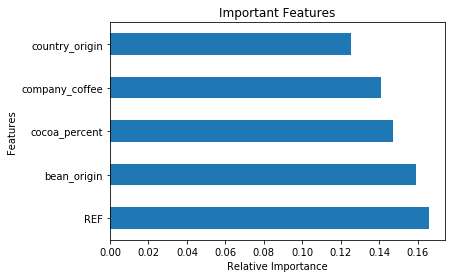

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectFromModel

#Splitting the variables into features and target
X = data_clean_label_encoding.drop('rating', axis=1)
y = data_clean_label_encoding['rating'].values

print(X.shape)#printing dimensions of features
print(y.shape)#printing dimensions of label

#Printing the variability of all the features
#Since the Variability of any column is not very low so selecting all the features based on variability
print(X.var())


# Using ExtraTreesClassifier for feature selection
model = ExtraTreesClassifier()
model.fit(X,y)
print "Dataset Size Before Feature Selection "
print X.shape
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_feat_select = model.transform(X)
print "Dataset Size After Feature Selection "
print X_feat_select.shape            
print "Relative Feature importance for each of the Features- "
print(clf.feature_importances_)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()




### Task-4

### Performing Data Partitioning

In [21]:
# We have prepared three suits for the partition

# Suite-1 training- 80% testing- 20%
X_suite1_train, X_suite1_test, y_suite1_train, y_suite1_test = train_test_split(X_feat_select, y, test_size= 0.2, random_state=42)
print 'Suite-1 training and testing size'
print X_suite1_train.shape
print X_suite1_test.shape

# Suite-1 training- 60% testing- 40%
X_suite2_train, X_suite2_test, y_suite2_train, y_suite2_test = train_test_split(X_feat_select, y, test_size= 0.4, random_state=42)
print 'Suite-2 training and testing size'
print X_suite2_train.shape
print X_suite2_test.shape

# Suite-1 training- 70% testing- 30%
X_suite3_train, X_suite3_test, y_suite3_train, y_suite3_test = train_test_split(X_feat_select, y, test_size= 0.3, random_state=42)
print 'Suite-3 training and testing size'
print X_suite3_train.shape
print X_suite3_test.shape

Suite-1 training and testing size
(1200, 5)
(300, 5)
Suite-2 training and testing size
(900, 5)
(600, 5)
Suite-3 training and testing size
(1050, 5)
(450, 5)


### Task-5

### Random Forest Model Development

In [22]:
from sklearn.ensemble import RandomForestClassifier  #max_leaf_nodes = 7
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_validate

# Model Hypertuning with Suite-1
print 'Results with suite-1'
# max_leaf_nodes =5
model_suite1_node5 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =5)

cv = cross_validate(model_suite1_node5, X_suite1_train, y_suite1_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-1 mean test cvscores for max_leaf_nodes =5', cv['test_score'].mean())

# max_leaf_nodes =6
model_suite1_node6 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =6)

cv = cross_validate(model_suite1_node6, X_suite1_train, y_suite1_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-1 mean test cvscores for max_leaf_nodes =6', cv['test_score'].mean())

# max_leaf_nodes =7
model_suite1_node7 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite1_node7, X_suite1_train, y_suite1_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-1 mean test cvscores for max_leaf_nodes =7', cv['test_score'].mean())


# max_leaf_nodes =8
model_suite1_node8 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite1_node8, X_suite1_train, y_suite1_train, cv=4)

print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-1 mean test cvscores for max_leaf_nodes =8', cv['test_score'].mean())

# Model Hypertuning with Suite-2
print '\n Results with suite-2'
# max_leaf_nodes =5
model_suite2_node5 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =5)

cv = cross_validate(model_suite2_node5, X_suite2_train, y_suite2_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-2 mean test cvscores for max_leaf_nodes =5', cv['test_score'].mean())

# max_leaf_nodes =6
model_suite2_node6 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =6)

cv = cross_validate(model_suite2_node6, X_suite2_train, y_suite2_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-2 mean test cvscores for max_leaf_nodes =6', cv['test_score'].mean())

# max_leaf_nodes =7
model_suite2_node7 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite2_node7, X_suite2_train, y_suite2_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-2 mean test cvscores for max_leaf_nodes =7', cv['test_score'].mean())


# max_leaf_nodes =8
model_suite2_node8 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite2_node8, X_suite2_train, y_suite2_train, cv=4)

print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-2 mean test cvscores for max_leaf_nodes =8', cv['test_score'].mean())

# Model Hypertuning with Suite-3
print '\n Results with suite-3'
# max_leaf_nodes =5
model_suite3_node5 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =5)

cv = cross_validate(model_suite3_node5, X_suite3_train, y_suite3_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-3 mean test cvscores for max_leaf_nodes =5', cv['test_score'].mean())

# max_leaf_nodes =6
model_suite3_node6 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =6)

cv = cross_validate(model_suite3_node6, X_suite3_train, y_suite3_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-3 mean test cvscores for max_leaf_nodes =6', cv['test_score'].mean())

# max_leaf_nodes =7
model_suite3_node7 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite3_node7, X_suite3_train, y_suite3_train, cv=4)
print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-3 mean test cvscores for max_leaf_nodes =7', cv['test_score'].mean())


# max_leaf_nodes =8
model_suite3_node8 = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =7)

cv = cross_validate(model_suite3_node8, X_suite3_train, y_suite3_train, cv=4)

print(cv['test_score'])
print ("\n")
print cv
print ("\n")
print('Suite-3 mean test cvscores for max_leaf_nodes =8', cv['test_score'].mean())

# Random Forest classifier with max_leaf_nodes= 5 gave the best validation performance of 22.32% with suite=2

Results with suite-1
[0.21452145 0.22847682 0.22073579 0.23648649]


{'score_time': array([0.00177503, 0.00141287, 0.00139308, 0.00122499]), 'test_score': array([0.21452145, 0.22847682, 0.22073579, 0.23648649]), 'train_score': array([0.26532887, 0.24276169, 0.27524972, 0.25774336]), 'fit_time': array([0.02845192, 0.02675509, 0.02323604, 0.02253008])}


('Suite-1 mean test cvscores for max_leaf_nodes =5', 0.2250551364442328)
[0.20132013 0.20860927 0.21404682 0.23648649]


{'score_time': array([0.00123501, 0.00124407, 0.00137401, 0.00135612]), 'test_score': array([0.20132013, 0.20860927, 0.21404682, 0.23648649]), 'train_score': array([0.27090301, 0.25946548, 0.27857936, 0.25884956]), 'fit_time': array([0.02232003, 0.02209783, 0.02432919, 0.02752495])}


('Suite-1 mean test cvscores for max_leaf_nodes =6', 0.2151156781913354)
[0.19141914 0.20860927 0.2006689  0.23648649]


{'score_time': array([0.00127101, 0.00124478, 0.00121903, 0.00137687]), 'test_score': array([0.19141914, 0.20860927, 

#### Random Forest classifier with max_leaf_nodes= 5 gave the best validation performance of 22.32% with suite=2

### KNN Model Development

In [23]:
#Task 5: KNN Model Development with Suite-1
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

#Model Development on Suite1 i.e. 80 - 20 partition

#Performing 5-fold cross validation within the training data
kfCV = KFold(n_splits=5)
split = kfCV.split(X_suite1_train)

#printing the actual training data and validation data in each fold
for trData, vlData in kfCV.split(X_suite1_train):
   print("[Fold]", 'Actual Training data:', trData, 'Validation data:', vlData)

#Proposing 5 possible values for n_neighbors as 19,20,21,22 and 23

#Obtaining the performance on each fold for k = 19
knn = KNeighborsClassifier(n_neighbors=19)
s = cross_validate(knn, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 19', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 20
knn = KNeighborsClassifier(n_neighbors=20)
s = cross_validate(knn, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 20', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 21
knn = KNeighborsClassifier(n_neighbors=21)
s = cross_validate(knn, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 21', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 22
knn = KNeighborsClassifier(n_neighbors=22)
s = cross_validate(knn,X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 22', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")

#Obtaining the performance on each fold for k = 23
knn = KNeighborsClassifier(n_neighbors=23)
s = cross_validate(knn,X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 23', s['test_score'].mean()) #Calculating the mean of performance of the folds

#Based on the results for suite-1 , model has highest performance for k = 22 validation accuracy- 18.52%


('[Fold]', 'Actual Training data:', array([ 240,  241,  242,  243,  244,  245,  246,  247,  248,  249,  250,
        251,  252,  253,  254,  255,  256,  257,  258,  259,  260,  261,
        262,  263,  264,  265,  266,  267,  268,  269,  270,  271,  272,
        273,  274,  275,  276,  277,  278,  279,  280,  281,  282,  283,
        284,  285,  286,  287,  288,  289,  290,  291,  292,  293,  294,
        295,  296,  297,  298,  299,  300,  301,  302,  303,  304,  305,
        306,  307,  308,  309,  310,  311,  312,  313,  314,  315,  316,
        317,  318,  319,  320,  321,  322,  323,  324,  325,  326,  327,
        328,  329,  330,  331,  332,  333,  334,  335,  336,  337,  338,
        339,  340,  341,  342,  343,  344,  345,  346,  347,  348,  349,
        350,  351,  352,  353,  354,  355,  356,  357,  358,  359,  360,
        361,  362,  363,  364,  365,  366,  367,  368,  369,  370,  371,
        372,  373,  374,  375,  376,  377,  378,  379,  380,  381,  382,
        383,  3

('[Fold]', 'Actual Training data:', array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  1

/Users/nikita/opt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


('test cvscores:', array([0.17886179, 0.1875    , 0.14166667, 0.17226891, 0.20762712]))
{'score_time': array([0.00991583, 0.01011682, 0.00980496, 0.00913095, 0.01132512]), 'test_score': array([0.17886179, 0.1875    , 0.14166667, 0.17226891, 0.20762712]), 'train_score': array([0.28301887, 0.29479167, 0.28125   , 0.27546778, 0.26659751]), 'fit_time': array([0.000633  , 0.00093722, 0.00074196, 0.00060511, 0.00081897])}
('mean test cvscores for k = 19', 0.1775848962983292)
------------------------------------------
('test cvscores:', array([0.17479675, 0.16666667, 0.15      , 0.16806723, 0.20338983]))
{'score_time': array([0.0082891 , 0.00808406, 0.00825691, 0.00815201, 0.00804114]), 'test_score': array([0.17479675, 0.16666667, 0.15      , 0.16806723, 0.20338983]), 'train_score': array([0.28092243, 0.284375  , 0.28645833, 0.27754678, 0.26970954]), 'fit_time': array([0.00056911, 0.00052309, 0.00057006, 0.00053883, 0.00054097])}
('mean test cvscores for k = 20', 0.17258409440667546)
--------

In [24]:
#Model Development on Suite2 

#Performing 5-fold cross validation within the training data
kfCV = KFold(n_splits=5)
split = kfCV.split(X_suite2_train)

#printing the actual training data and validation data in each fold
for trData, vlData in kfCV.split(X_suite2_train):
   print("[Fold]", 'Actual Training data:', trData, 'Validation data:', vlData)

#Proposing 5 possible values for n_neighbors as 19,20,21,22 and 23

#Obtaining the performance on each fold for k = 19
knn = KNeighborsClassifier(n_neighbors=19)
s = cross_validate(knn, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 19', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 20
knn = KNeighborsClassifier(n_neighbors=20)
s = cross_validate(knn, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 20', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 21
knn = KNeighborsClassifier(n_neighbors=21)
s = cross_validate(knn, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 21', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 22
knn = KNeighborsClassifier(n_neighbors=22)
s = cross_validate(knn, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 22', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")

#Obtaining the performance on each fold for k = 23
knn = KNeighborsClassifier(n_neighbors=23)
s = cross_validate(knn, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 23', s['test_score'].mean()) #Calculating the mean of performance of the folds

#Based on the results for suite-2 , model has highest performance for k = 21 validation accuracy- 17.12%


('[Fold]', 'Actual Training data:', array([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
       349, 350, 351, 352, 3

('test cvscores:', array([0.17837838, 0.13186813, 0.17222222, 0.16384181, 0.1875    ]))
{'score_time': array([0.00698805, 0.00678492, 0.00659704, 0.00647497, 0.00926518]), 'test_score': array([0.17837838, 0.13186813, 0.17222222, 0.16384181, 0.1875    ]), 'train_score': array([0.32027972, 0.2729805 , 0.29722222, 0.31120332, 0.27348066]), 'fit_time': array([0.00058103, 0.00060296, 0.00052094, 0.00052905, 0.00047588])}
('mean test cvscores for k = 19', 0.1667621080756674)
------------------------------------------
('test cvscores:', array([0.17297297, 0.15384615, 0.16666667, 0.15254237, 0.19318182]))
{'score_time': array([0.00720882, 0.00725794, 0.00741291, 0.0064199 , 0.00596595]), 'test_score': array([0.17297297, 0.15384615, 0.16666667, 0.15254237, 0.19318182]), 'train_score': array([0.31468531, 0.29526462, 0.28611111, 0.29598893, 0.28314917]), 'fit_time': array([0.00056815, 0.00064206, 0.00064611, 0.00055099, 0.00051308])}
('mean test cvscores for k = 20', 0.1678419969097935)
---------

In [25]:
# KNN Model Development on Suite3

#Performing 5-fold cross validation within the training data
kfCV = KFold(n_splits=5)
split = kfCV.split(X_suite3_train)

#printing the actual training data and validation data in each fold
for trData, vlData in kfCV.split(X_suite3_train):
   print("[Fold]", 'Actual Training data:', trData, 'Validation data:', vlData)

#Proposing 5 possible values for n_neighbors as 19,20,21,22 and 23

#Obtaining the performance on each fold for k = 19
knn = KNeighborsClassifier(n_neighbors=19)
s = cross_validate(knn, X_suite3_train, y_suite3_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 19', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 20
knn = KNeighborsClassifier(n_neighbors=20)
s = cross_validate(knn,  X_suite3_train, y_suite3_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 20', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 21
knn = KNeighborsClassifier(n_neighbors=21)
s = cross_validate(knn,  X_suite3_train, y_suite3_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 21', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")
#Obtaining the performance on each fold for k = 22
knn = KNeighborsClassifier(n_neighbors=22)
s = cross_validate(knn,  X_suite3_train, y_suite3_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 22', s['test_score'].mean()) #Calculating the mean of performance of the folds

print("------------------------------------------")

#Obtaining the performance on each fold for k = 23
knn = KNeighborsClassifier(n_neighbors=23)
s = cross_validate(knn,  X_suite3_train, y_suite3_train, cv=5, scoring='accuracy')
print('test cvscores:', s['test_score'] )
print(s)
print ('mean test cvscores for k = 23', s['test_score'].mean()) #Calculating the mean of performance of the folds

#Based on the results for suite-3 , model has highest performance for k = 20 validation accuracy- 17.81%


('[Fold]', 'Actual Training data:', array([ 210,  211,  212,  213,  214,  215,  216,  217,  218,  219,  220,
        221,  222,  223,  224,  225,  226,  227,  228,  229,  230,  231,
        232,  233,  234,  235,  236,  237,  238,  239,  240,  241,  242,
        243,  244,  245,  246,  247,  248,  249,  250,  251,  252,  253,
        254,  255,  256,  257,  258,  259,  260,  261,  262,  263,  264,
        265,  266,  267,  268,  269,  270,  271,  272,  273,  274,  275,
        276,  277,  278,  279,  280,  281,  282,  283,  284,  285,  286,
        287,  288,  289,  290,  291,  292,  293,  294,  295,  296,  297,
        298,  299,  300,  301,  302,  303,  304,  305,  306,  307,  308,
        309,  310,  311,  312,  313,  314,  315,  316,  317,  318,  319,
        320,  321,  322,  323,  324,  325,  326,  327,  328,  329,  330,
        331,  332,  333,  334,  335,  336,  337,  338,  339,  340,  341,
        342,  343,  344,  345,  346,  347,  348,  349,  350,  351,  352,
        353,  3

('test cvscores:', array([0.15023474, 0.18779343, 0.17619048, 0.16746411, 0.18536585]))
{'score_time': array([0.00748682, 0.00717211, 0.00717497, 0.007164  , 0.007761  ]), 'test_score': array([0.15023474, 0.18779343, 0.17619048, 0.16746411, 0.18536585]), 'train_score': array([0.29151732, 0.27479092, 0.28571429, 0.29726516, 0.28639053]), 'fit_time': array([0.00054312, 0.00051785, 0.00052404, 0.00052691, 0.00056601])}
('mean test cvscores for k = 19', 0.17340972273912664)
------------------------------------------
('test cvscores:', array([0.15492958, 0.18779343, 0.17619048, 0.19617225, 0.17560976]))
{'score_time': array([0.00851893, 0.01148105, 0.00749803, 0.00716901, 0.00721693]), 'test_score': array([0.15492958, 0.18779343, 0.17619048, 0.19617225, 0.17560976]), 'train_score': array([0.30585424, 0.28315412, 0.2952381 , 0.28775268, 0.27810651]), 'fit_time': array([0.00068212, 0.00059915, 0.00057197, 0.000494  , 0.0005312 ])}
('mean test cvscores for k = 20', 0.17813909715734014)
-------

#### KNN has the best validation perforamce of 17.81% based on suite-3 dataset

### Neural Network Model Development

In [26]:
# Hypertuning for the model Neural network:
# Using the dataset Suite-1

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Hidden layer sizes: (2,2)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1)

s = cross_val_score(MLP, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (2,2)', s.mean())

# Hidden layer sizes: (3,3)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (3,3)', s.mean())

# Hidden layer sizes: (5,5)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

s = cross_val_score(MLP, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (5,5)', s.mean())

# Hidden layer sizes: (10,10)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10), random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (10,10)', s.mean())

# Hidden layer sizes: 3
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 3', s.mean())

# Hidden layer sizes: 5
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5, random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 5', s.mean())

# Hidden layer sizes: 7
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=7, random_state=1)

s = cross_val_score(MLP, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 7', s.mean())

# Hidden layer sizes: 9
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=9, random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 9', s.mean())

# Hidden layer sizes: 10
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=15, random_state=1)

s = cross_val_score(MLP, X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 15', s.mean())

# Hidden layer sizes: 20
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=20, random_state=1)

s = cross_val_score(MLP,  X_suite1_train, y_suite1_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 20', s.mean())

# For suite-1 , Neural Network has highest validation accuracy of - 22.08%

('cvscores:', array([0.21544715, 0.22083333, 0.22083333, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = (2,2)', 0.2200283759638622)
('cvscores:', array([0.21138211, 0.22083333, 0.22083333, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = (3,3)', 0.21921536783378087)
('cvscores:', array([0.21138211, 0.22083333, 0.21666667, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = (5,5)', 0.21838203450044755)
('cvscores:', array([0.19105691, 0.22083333, 0.22083333, 0.21848739, 0.22033898]))
('mean cvscores for layer_sizes = (10,10)', 0.21430999104892062)
('cvscores:', array([0.21544715, 0.22083333, 0.22083333, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = 3', 0.2200283759638622)
('cvscores:', array([0.21544715, 0.22083333, 0.22083333, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = 5', 0.2200283759638622)
('cvscores:', array([0.21544715, 0.22083333, 0.21666667, 0.22268908, 0.22033898]))
('mean cvscores for layer_sizes = 7', 0.2191950426

In [27]:
# Hypertuning for the model Neural network:
# Using the dataset Suite-2

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Hidden layer sizes: (2,2)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (2,2)', s.mean())

# Hidden layer sizes: (3,3)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (3,3)', s.mean())

# Hidden layer sizes: (5,5)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (5,5)', s.mean())

# Hidden layer sizes: (10,10)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10), random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (10,10)', s.mean())

# Hidden layer sizes: 3
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 3', s.mean())

# Hidden layer sizes: 5
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5, random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 5', s.mean())

# Hidden layer sizes: 7
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=7, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 7', s.mean())

# Hidden layer sizes: 9
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=9, random_state=1)

s = cross_val_score(MLP,   X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 9', s.mean())

# Hidden layer sizes: 10
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=15, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 15', s.mean())

# Hidden layer sizes: 20
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=20, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 20', s.mean())

# For suite-2 , Neural Network has highest validation accuracy of - 21.89%

('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (2,2)', 0.21891859896097182)
('cvscores:', array([0.20540541, 0.21428571, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (3,3)', 0.2156575356999086)
('cvscores:', array([0.2       , 0.21978022, 0.2       , 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (5,5)', 0.21234202238439526)
('cvscores:', array([0.21621622, 0.20879121, 0.17222222, 0.21468927, 0.22159091]))
('mean cvscores for layer_sizes = (10,10)', 0.2067019643714559)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 3', 0.21891859896097182)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 5', 0.21891859896097182)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 7', 0.218918598

In [28]:
# Hypertuning for the model Neural network:
# Using the dataset Suite-3

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Hidden layer sizes: (2,2)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2,2), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (2,2)', s.mean())

# Hidden layer sizes: (3,3)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (3,3)', s.mean())

# Hidden layer sizes: (5,5)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (5,5)', s.mean())

# Hidden layer sizes: (10,10)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10), random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = (10,10)', s.mean())

# Hidden layer sizes: 3
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=3, random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 3', s.mean())

# Hidden layer sizes: 5
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=5, random_state=1)

s = cross_val_score(MLP,  X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 5', s.mean())

# Hidden layer sizes: 7
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=7, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 7', s.mean())

# Hidden layer sizes: 9
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=9, random_state=1)

s = cross_val_score(MLP,   X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 9', s.mean())

# Hidden layer sizes: 10
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=15, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 15', s.mean())

# Hidden layer sizes: 20
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=20, random_state=1)

s = cross_val_score(MLP, X_suite2_train, y_suite2_train, cv=5, scoring='accuracy')
print('cvscores:', s )
print ('mean cvscores for layer_sizes = 20', s.mean())

# For suite-3 , Neural Network has highest validation accuracy of - 21.89%

('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (2,2)', 0.21891859896097182)
('cvscores:', array([0.20540541, 0.21428571, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (3,3)', 0.2156575356999086)
('cvscores:', array([0.2       , 0.21978022, 0.2       , 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = (5,5)', 0.21234202238439526)
('cvscores:', array([0.21621622, 0.20879121, 0.17222222, 0.21468927, 0.22159091]))
('mean cvscores for layer_sizes = (10,10)', 0.2067019643714559)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 3', 0.21891859896097182)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 5', 0.21891859896097182)
('cvscores:', array([0.21621622, 0.21978022, 0.21666667, 0.22033898, 0.22159091]))
('mean cvscores for layer_sizes = 7', 0.218918598

#### Neural Network has highest validation accuracy of - 22.08% for both Suite-1 

### Task-6 Performing Performance Assessment

#### Out of three classifier, Random Forest classifier has the best validation performance of 22.32% with suite=2
#### Based on this result we have decided to select Random Forest as the best classifier for this problem

In [29]:
model = RandomForestClassifier(random_state=42, n_estimators= 8, \
                               max_depth= 3, min_samples_leaf= 8, min_samples_split = 26,\
                              max_leaf_nodes =5)

#Train the model using the training sets
model.fit(X_suite2_train, y_suite2_train)

#Predict the response for test dataset
y_pred = model.predict(X_suite2_test)


#  Add a column in the test dataset which holds the predictions for each row
temp = pd.DataFrame(X_suite2_test)
df_pred = pd.DataFrame(y_pred) 
df_pred.columns = ['predicted']

test_dataset = pd.concat([temp, df_pred], axis=1, sort=False)
print test_dataset.head()
print test_dataset.shape


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Getting the accuracy metric
acc = accuracy_score(y_pred, y_suite2_test)
pre = precision_score(y_pred, y_suite2_test, average='micro')
rec = recall_score(y_pred, y_suite2_test,average='micro')
f1 = f1_score(y_pred, y_suite2_test, average='micro')
print '\n'
print 'Model Performance Statistic Suite-2: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_suite2_test, y_pred)
print '\n'

       0         1         2      3     4  predicted
0  193.0 -0.263082 -0.888493  141.0  17.0          8
1  345.0  1.304070 -0.249749   59.0  75.0          8
2   24.0 -0.787871  0.069623   17.0  87.0          9
3  162.0 -1.783346 -1.207865   98.0  39.0          6
4  188.0 -0.838366 -1.846610    1.0   4.0          8
(600, 6)


Model Performance Statistic Suite-2: 
Accuracy:  0.235
Precision:  0.235
Recall:  0.235
F1 Score:  0.235
Confusion Metrix:
[[  0   1   0   0   0   1   1   1   0   0   0]
 [  0   0   0   0   0   2   1   0   0   0   0]
 [  0   1   0   0   0   3   0   3   0   0   0]
 [  0   0   0   0   0   9   0  19   0   0   0]
 [  0   0   0   0   0  19   1  48   0   0   0]
 [  0   0   0   0   0  36   2  79   0   0   0]
 [  0   0   0   0   0  24   2  68   1   0   0]
 [  0   0   0   0   0  19   2 103   0   0   0]
 [  0   0   0   0   0  10   1  80   0   0   0]
 [  0   0   0   0   0  13   0  43   0   0   0]
 [  0   0   0   0   0   1   0   6   0   0   0]]




### Task-7 Analysis


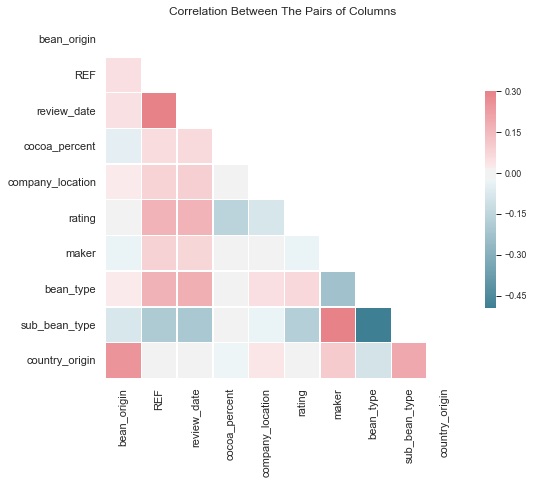

In [30]:
# Finding out the correlation between the features
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

sns.set(style="white")

# Compute the correlation matrix
corr = data_clean_label_encoding [['bean_origin','REF','review_date','cocoa_percent','company_location'\
                   ,'rating','maker','bean_type', 'sub_bean_type',\
                   'country_origin']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12}) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Between The Pairs of Columns ')
plt.show()

               rating
review_date          
2006         3.133333
2007         3.132812
2008         2.960526
2009         3.060185
2010         3.152632
2011         3.255474
2012         3.171474
2013         3.190397
2014         3.189858
2015         3.242647
2016         3.243056
2017         3.347826


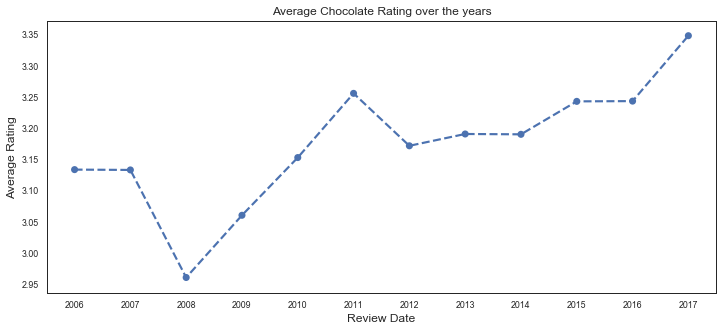

In [31]:
# The trend of chocolate rating over the years
data_clean['rating'] = pd.to_numeric(data_clean['rating'], errors='coerce')

gp = data_clean.groupby('review_date').aggregate({'rating':'mean'})
print(gp)
gp = gp.reset_index()


# Plotting between review_date and average rating
plt.figure(figsize=(12, 5))
sns.pointplot(x="review_date", y="rating", markers='o', linestyles="--",data=gp)
plt.xlabel("Review Date")#X-label
plt.ylabel("Average Rating")#Y-label
plt.title("Average Chocolate Rating over the years")#Title of the plot
plt.show()

Count for ratings:
3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
2.50    115
4.00     82
2.00     28
2.25     12
1.50      9
1.00      4
5.00      2
1.75      1
Name: rating, dtype: int64


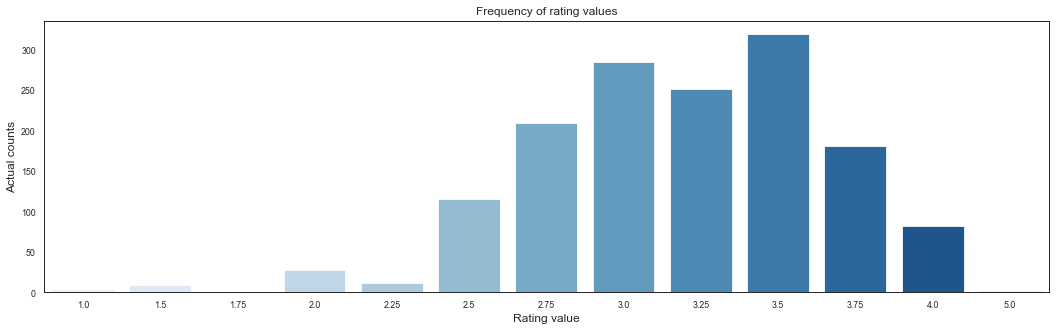

In [32]:
# The distribution of Rating for the chocolates in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
rating_counts = data_clean.rating.value_counts()
print 'Count for ratings:\n',rating_counts 
plt.figure(figsize = (18, 5))
sns.barplot(x = rating_counts.index, y = rating_counts.values, palette = "Blues")
plt.xlabel("Rating value")
plt.ylabel("Actual counts")
plt.title("Frequency of rating values")
plt.show()